In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
sns.set(style="white")

In [2]:
df = pd.read_csv("C:/Users/nikhi/Desktop/python/customer churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print ("\nMissing values :  ", df.isnull().sum().values.sum())


Missing values :   0


In [3]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32')

EDA & Data Visualization  

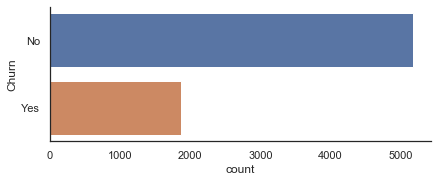

In [4]:
ax = sns.catplot(y="Churn", kind="count", data=df , height = 2.5, aspect = 2.5)

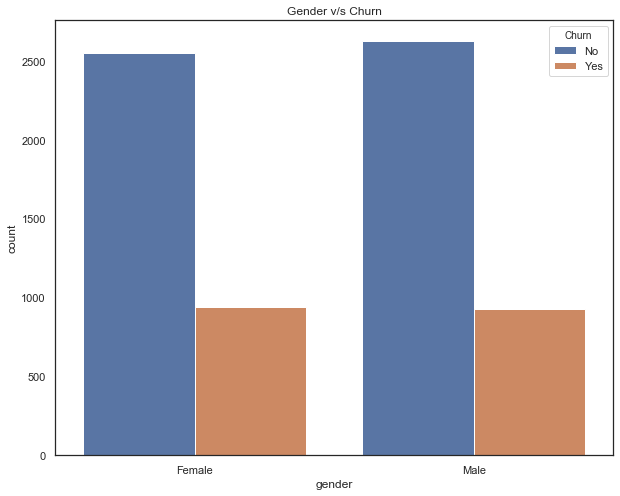

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(x='gender',hue='Churn',data=df)
plt.title('Gender v/s Churn')
plt.show()

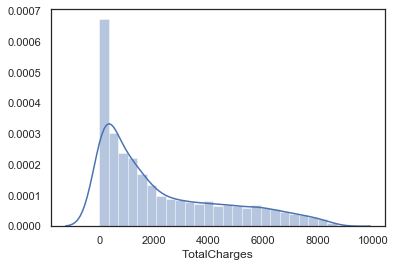

In [5]:
sns.distplot(df.TotalCharges)
plt.show()

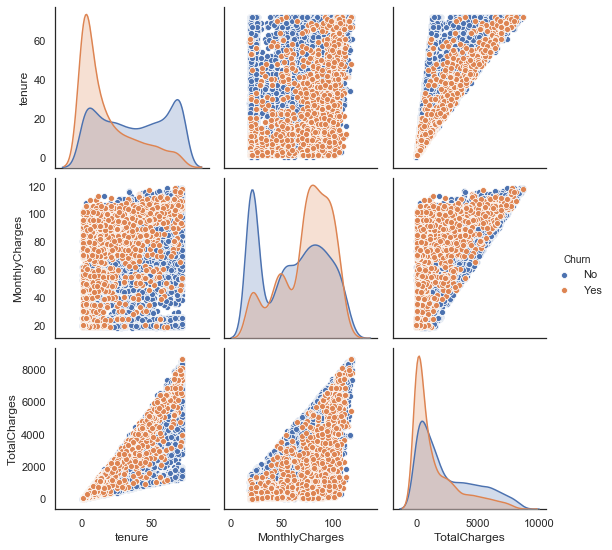

In [6]:
sns.pairplot(df, vars = ['tenure' , 'MonthlyCharges', 'TotalCharges'], hue='Churn')

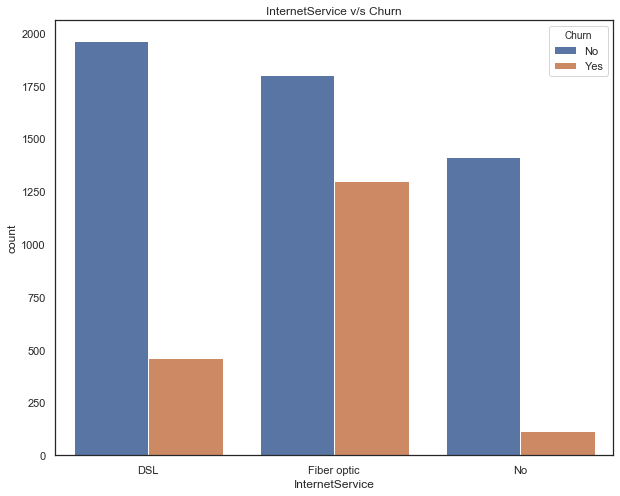

In [7]:
plt.figure(figsize=(10,8))
sns.countplot(x='InternetService',hue='Churn',data=df)
plt.title('InternetService v/s Churn')
plt.show()

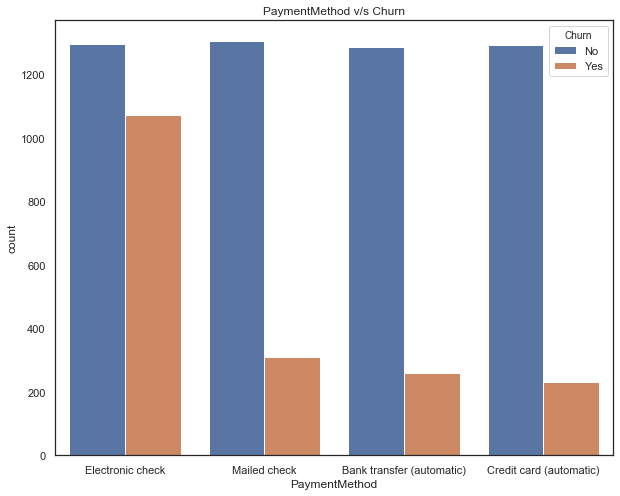

In [15]:
plt.figure(figsize=(10,8))
sns.countplot(x='PaymentMethod',hue='Churn',data=df)
plt.title('PaymentMethod v/s Churn')
plt.show()

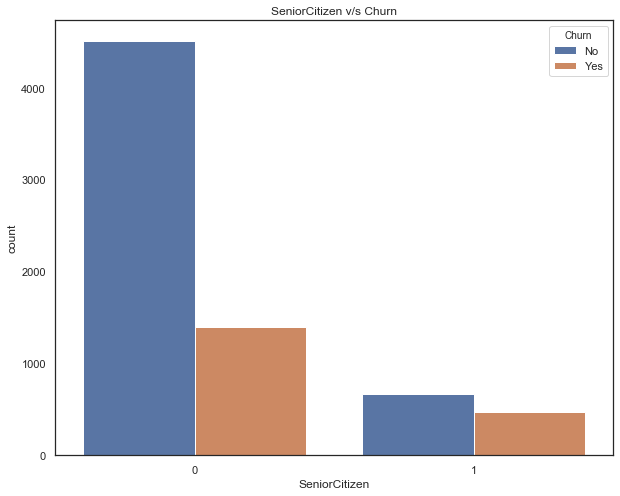

In [16]:
plt.figure(figsize=(10,8))
sns.countplot(x='SeniorCitizen',hue='Churn',data=df)
plt.title('SeniorCitizen v/s Churn')
plt.show()

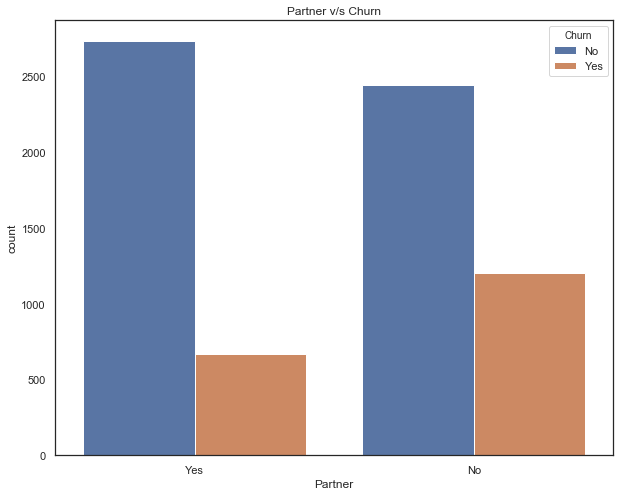

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(x='Partner',hue='Churn',data=df)
plt.title('Partner v/s Churn')
plt.show()

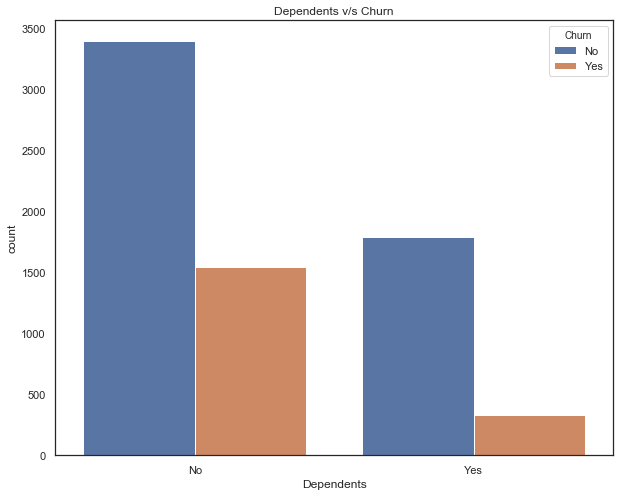

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(x='Dependents',hue='Churn',data=df)
plt.title('Dependents v/s Churn')
plt.show()

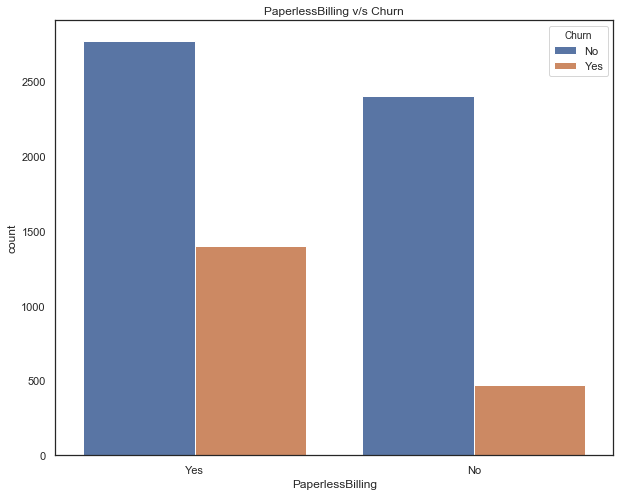

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(x='PaperlessBilling',hue='Churn',data=df)
plt.title('PaperlessBilling v/s Churn')
plt.show()

In [23]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.103006
tenure,0.016567,1.000000,0.247900,0.826178
MonthlyCharges,0.220173,0.247900,1.000000,0.651174
TotalCharges,0.103006,0.826178,0.651174,1.000000


In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.drop(['customerID'], axis=1, inplace=True)

In [11]:
df = pd.get_dummies(df, columns = ['gender', 'Partner',   'Dependents','PhoneService','MultipleLines','InternetService',
                                'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                 'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn'], drop_first = True)

In [12]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors = 'coerce')
df.drop(['TotalCharges'], axis = 1, inplace = True)

In [13]:
df['Churn_Yes'] = df['Churn_Yes'].astype(int)

In [14]:
Y = df['Churn_Yes'].values
X = df.drop(labels = ['Churn_Yes'], axis = 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [25]:
from sklearn import metrics
prediction_test = model.predict(X_test)# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8080198722498225


In [17]:
weights = pd.Series(model.coef_[0],
 index=X.columns.values)
weights.sort_values(ascending = False)

InternetService_Fiber optic              0.851560
PaymentMethod_Electronic check           0.398956
PaperlessBilling_Yes                     0.302975
SeniorCitizen                            0.273977
StreamingTV_Yes                          0.273827
MultipleLines_Yes                        0.243090
StreamingMovies_Yes                      0.216624
MultipleLines_No phone service           0.111678
PaymentMethod_Mailed check               0.095711
MonthlyCharges                           0.005118
gender_Male                             -0.007982
tenure                                  -0.033219
Partner_Yes                             -0.059350
DeviceProtection_Yes                    -0.059506
Dependents_Yes                          -0.076394
PaymentMethod_Credit card (automatic)   -0.079960
StreamingTV_No internet service         -0.080146
TechSupport_No internet service         -0.080146
DeviceProtection_No internet service    -0.080146
StreamingMovies_No internet service     -0.080146


XGBoost 

In [19]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [21]:
y1 = df['Churn_Yes'].values
X1 = df.drop(labels = ['Churn_Yes'], axis = 1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.4, random_state=56)

In [23]:
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)

In [24]:
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 0.84
Accuracy of XGB classifier on test set: 0.81


In [30]:
from sklearn.metrics import classification_report,confusion_matrix
y1_predict = xgb_model.predict(X_test)
print(classification_report(y_test, y1_predict))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      2076
           1       0.67      0.52      0.59       742

    accuracy                           0.81      2818
   macro avg       0.75      0.72      0.73      2818
weighted avg       0.80      0.81      0.80      2818



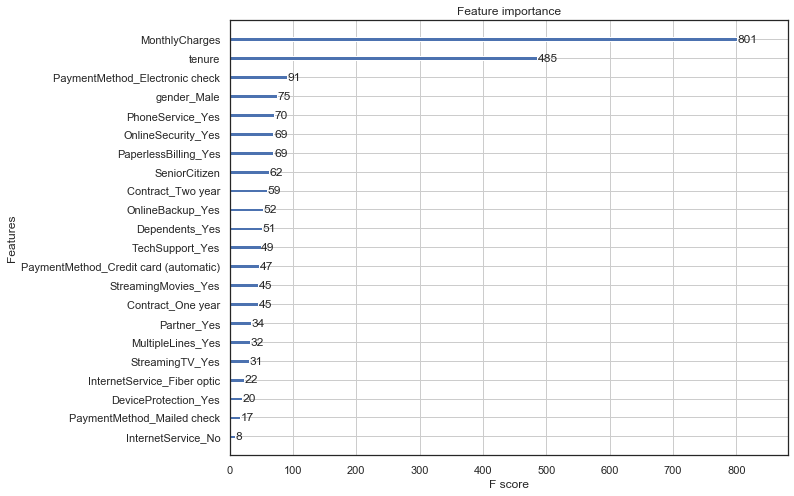

In [31]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_model, ax=ax)

In [33]:
df['proba']  =xgb_model.predict_proba(df[X_train.columns])[:,1]
df[['proba']].head()

,proba
0,0.720811
1,0.026664
2,0.345247
3,0.041357
4,0.697354
